In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
num_labels=len(np.unique(y_train))
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
shape1=x_train.shape[1]
shape2=x_train.shape[2]
x_train=x_train.reshape(-1, shape1,shape2,1).astype('float32')
x_test=x_test.reshape(-1, shape1,shape2,1).astype('float32')
x_train=x_train/255.
x_test=x_test/255.
#표본수를 포함하여 4D 텐서이므로 입력은 3D 텐서가 된다.
input_shape=(shape1,shape2,1)
batch_size=64
kernel_size=3
pool_size=2
filters=64
dropout=0.3

In [3]:
model=Sequential()
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 576)              

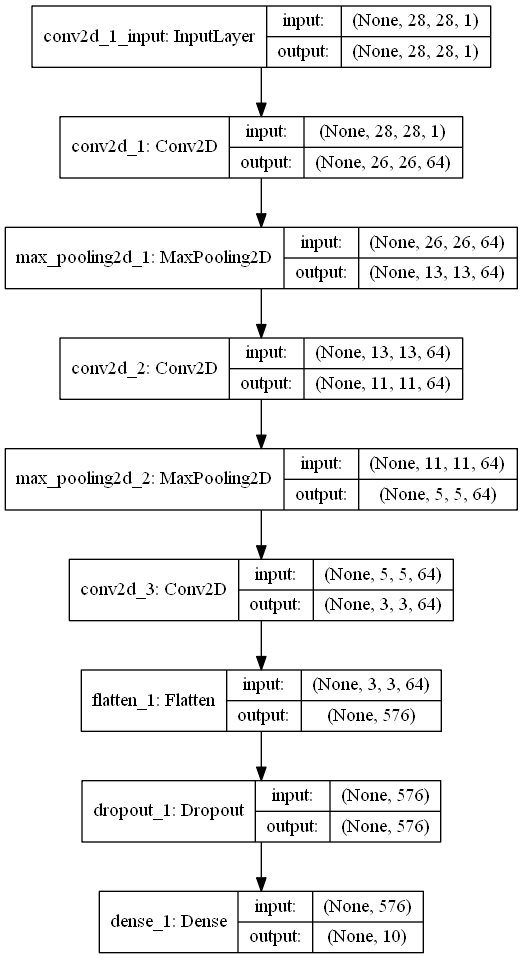

In [4]:
plot_model(model,  to_file='C:/Users/ysp/Desktop/딥러닝 프로그램/ch2_2.png',show_shapes=True)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(shape1,shape2,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=64)
results=model.evaluate(x_test,y_test)
print(results)

Epoch 1/30
60000/60000 [==============================] - 21s 358us/step - loss: 0.2098 - accuracy: 0.9337
Epoch 2/30
60000/60000 [==============================] - 21s 348us/step - loss: 0.0592 - accuracy: 0.9816
Epoch 3/30
60000/60000 [==============================] - 21s 350us/step - loss: 0.0443 - accuracy: 0.9861
Epoch 4/30
60000/60000 [==============================] - 21s 353us/step - loss: 0.0354 - accuracy: 0.9890
Epoch 5/30
60000/60000 [==============================] - 21s 350us/step - loss: 0.0303 - accuracy: 0.9908
Epoch 6/30
60000/60000 [==============================] - 21s 349us/step - loss: 0.0284 - accuracy: 0.9908
Epoch 7/30
60000/60000 [==============================] - 21s 349us/step - loss: 0.0222 - accuracy: 0.9929
Epoch 8/30
60000/60000 [==============================] - 21s 350us/step - loss: 0.0205 - accuracy: 0.9937
Epoch 9/30
60000/60000 [==============================] - 21s 349us/step - loss: 0.0177 - accuracy: 0.9946
Epoch 10/30
60000/60000 [============

In [9]:
import numpy as np
from keras.layers import Dense, Dropout, Input
from keras.models import Model
x=Input(shape=input_shape)
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(x)
h=MaxPooling2D()(h) #maxpooling2D의 default는 (2,2)임
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(h)
h=MaxPooling2D()(h) #maxpooling2D의 default는 (2,2)임
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(h)
h=Flatten()(h)
h=Dropout(dropout)(h)
out=Dense(num_labels,activation='softmax')(h)
model=Model(inputs=x,outputs=out)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=64)
score=model.evaluate(x_test,y_test)
print(score)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0   